# 波士顿房价预测

波士顿房价预测实际上并不应该用处理序列数据的思想来计算，更恰当的方式是用机器学习或神经网络的Dense堆叠。  
也就是说这里不会用到Embedding和Conv1D的操作。  
不要遇到一维的数据就觉得应该使用NLP的套路。  

如何判断遇到的一维数据应该用什么套路，下表将进行概述：  

| 数据类型 | 套路 |  
| ---- | ---- |  
| 时序信号 | NLP |  
| 股价预测 | NLP |   
| 函数预测 | NLP |  
| 离散特征 | Dense or ML|  

可以感觉到，如果前一个数据点和当前数据点没有‘连续’的概念，应该使用 Dense 或 Machine Learning，反之应该使用 NLP。

实际上，Keras 官网对 boston_housing 数据集的描述如下：

This is a dataset taken from the StatLib library which is maintained at Carnegie Mellon University.  
Samples contain 13 attributes of houses at different locations around the Boston suburbs in the late 1970s. Targets are the median values of the houses at a location (in k$)  

可以看见其描述中使用了 ‘attributes’ 这个单词，这意味着其本身就是离散的特征。  

对于离散特征而言优先考虑使用机器学习中的SVM，其次再考虑使用多个 Dense 堆叠的神经网络。  

我希望尽管我们一直在讨论如何使用神经网络的问题，但不要把自己的目光局限在这里，就像有一个段子说 ‘一个人在博士群里发起了一滴水从很高的空中落下会不会砸死人’ 结果引发了激烈争论，最终归于平静的是一句话 ‘你们没有淋过雨么？’

In [1]:
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.preprocessing import sequence

import numpy as np
import matplotlib.pyplot as plt

## 载入数据

In [2]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data() 

#### 查看房价分布直方图

(array([ 15.,  48.,  72., 120.,  64.,  31.,  21.,   8.,   8.,  17.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

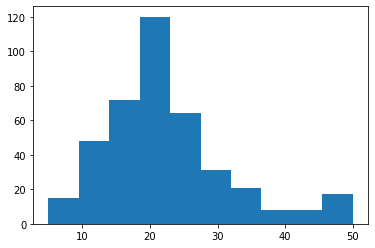

In [3]:
plt.hist(y_train)

## 搭建模型

In [4]:
input_layer = Input(shape=(13))
dense_1 = Dense(13, activation='relu')(input_layer)
dense_2 = Dense(10, activation='relu')(dense_1)
dense_3 = Dense(1, activation='relu')(dense_2)

In [5]:
model = Model(inputs=input_layer, outputs=dense_3)

## 编译模型

In [6]:
model.compile(loss='mae', optimizer='adam')

因为房价预测本质是回归问题，所以应该用回归问题的损失函数

## 训练模型

In [7]:
model.fit(x_train, y_train, epochs=5, verbose=1, batch_size=512)

Epoch 1/5
1/1 [==============================] - 1s 729ms/step - loss: 19.8923
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 16.9513
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 14.3967
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 12.4923
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 11.1569


## 用模型在测试集上做预测

In [8]:
y_pred = model.predict(x_test)

## 绘制测试集真实数据和预测得到的值

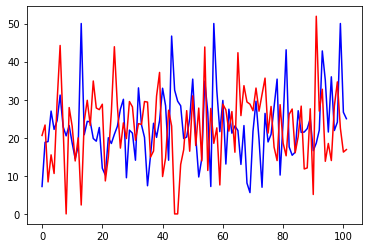

In [9]:
plt.plot(y_test, 'b')
plt.plot(y_pred, 'r')

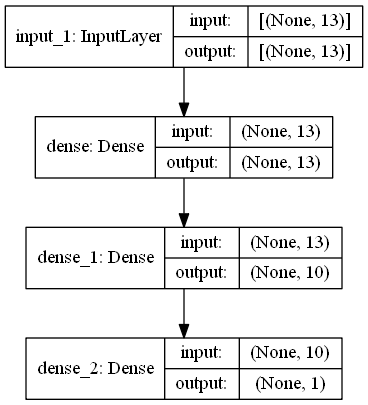

In [10]:
plot_model(model, show_shapes=True)